# Indonesia Covid-19 Cases by Provinces

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import folium as fo
from folium.plugins import FloatImage

<hr>

### 1. Sraping data from [Wikipedia](https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Indonesia)

In [2]:
# 1a. basic pandas read html table
data = pd.read_html('https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Indonesia')

In [3]:
data[3]

,Province,Confirmed,Recovered,Deaths,Active,Official website,Unnamed: 6_level_0
,Province,1414,75,122,1217,covid19.go.id,Unnamed: 6_level_1
0,Aceh,5,0,0,5,covid19.acehprov.go.id,NaN
1,Bali,19,0,2,17,infocorona.baliprov.go.id,NaN
2,Bangka Belitung,1,0,0,1,NaN,NaN
3,Banten,128,1,4,123,infocorona.bantenprov.go.id,NaN
4,Bengkulu,0,0,0,0,NaN,NaN
5,Central Java,81,0,7,74,corona.jatengprov.go.id,NaN
6,Central Kalimantan,7,0,0,7,corona.kalteng.go.id,NaN
7,Central Sulawesi,3,0,0,3,NaN,NaN
8,East Java,91,16,8,67,infocovid19.jatimprov.go.id,NaN


In [4]:
# 1b. pandas read html from https request
url = 'https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Indonesia'
x = requests.get(url)
datacorona = pd.read_html(x.text)

In [5]:
datacorona[3]

,Province,Confirmed,Recovered,Deaths,Active,Official website,Unnamed: 6_level_0
,Province,1414,75,122,1217,covid19.go.id,Unnamed: 6_level_1
0,Aceh,5,0,0,5,covid19.acehprov.go.id,NaN
1,Bali,19,0,2,17,infocorona.baliprov.go.id,NaN
2,Bangka Belitung,1,0,0,1,NaN,NaN
3,Banten,128,1,4,123,infocorona.bantenprov.go.id,NaN
4,Bengkulu,0,0,0,0,NaN,NaN
5,Central Java,81,0,7,74,corona.jatengprov.go.id,NaN
6,Central Kalimantan,7,0,0,7,corona.kalteng.go.id,NaN
7,Central Sulawesi,3,0,0,3,NaN,NaN
8,East Java,91,16,8,67,infocovid19.jatimprov.go.id,NaN


<hr>
    
### 2. Cleaning data

In [6]:
df = datacorona[3].copy()
df = df.iloc[:35, :5]
df.columns = ['Provinsi', 'Confirmed', 'Recovered', 'Deaths', 'Active cases']
df.iloc[12]['Provinsi'] = 'Jakarta'
# df.iloc[17]['Confirmed'] = 2
df[['Confirmed', 'Recovered', 'Deaths', 'Active cases']] = df[['Confirmed', 'Recovered', 'Deaths', 'Active cases']].astype('int32')

In [7]:
df

,Provinsi,Confirmed,Recovered,Deaths,Active cases
0,Aceh,5,0,0,5
1,Bali,19,0,2,17
2,Bangka Belitung,1,0,0,1
3,Banten,128,1,4,123
4,Bengkulu,0,0,0,0
5,Central Java,81,0,7,74
6,Central Kalimantan,7,0,0,7
7,Central Sulawesi,3,0,0,3
8,East Java,91,16,8,67
9,East Kalimantan,17,0,0,17


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Provinsi      35 non-null     object
 1   Confirmed     35 non-null     int32 
 2   Recovered     35 non-null     int32 
 3   Deaths        35 non-null     int32 
 4   Active cases  35 non-null     int32 
dtypes: int32(4), object(1)
memory usage: 764.0+ bytes


In [9]:
df.describe()

,Confirmed,Recovered,Deaths,Active cases
count,35.000000,35.000000,35.000000,35.000000
mean,40.371429,2.142857,3.485714,34.742857
std,121.218346,8.516913,12.827754,100.472514
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.500000
50%,5.000000,0.000000,0.000000,5.000000
75%,17.500000,0.000000,1.000000,16.000000
max,698.000000,48.000000,74.000000,576.000000


In [10]:
df[['Confirmed', 'Recovered', 'Deaths', 'Active cases']].sum()

Confirmed       1413
Recovered         75
Deaths           122
Active cases    1216
dtype: int64

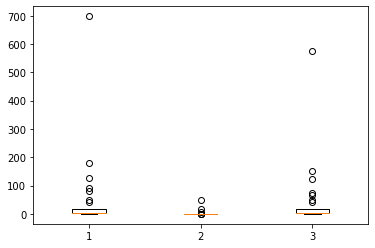

In [11]:
plt.boxplot([df['Confirmed'], df['Recovered'], df['Active cases']])
plt.show()

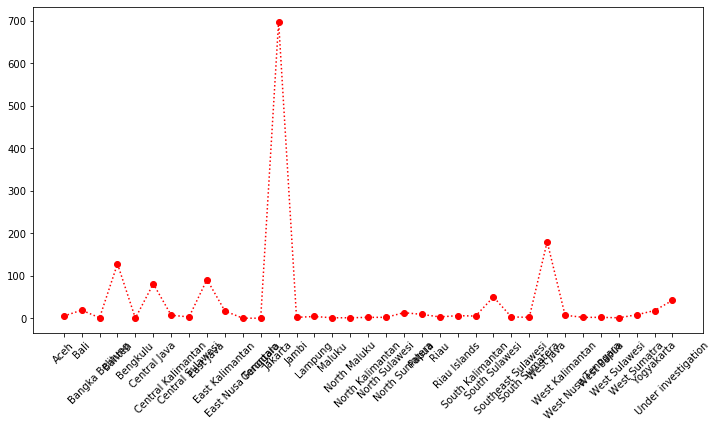

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df['Provinsi'], df['Confirmed'], 'r:o')
plt.xticks(rotation=45)
plt.show()

<hr>

### 3. Get provinces' position & logo from local file

In [13]:
prov = pd.read_json('./data/gps_indonesia.json')
prov

,Provinsi,latitude,longitude,logo
0,Aceh,4.695135,96.749399,https://upload.wikimedia.org/wikipedia/commons...
1,Bali,-8.409518,115.188916,https://4.bp.blogspot.com/-ELlrLdH0frM/WSz4Ajq...
2,Bangka Belitung,-2.741051,106.440587,https://upload.wikimedia.org/wikipedia/commons...
3,Banten,-6.405817,106.064018,https://upload.wikimedia.org/wikipedia/commons...
4,Bengkulu,-3.577847,102.346388,https://upload.wikimedia.org/wikipedia/commons...
5,Central Java,-7.150975,110.140259,https://upload.wikimedia.org/wikipedia/commons...
6,Central Kalimantan,-1.681488,113.382355,https://upload.wikimedia.org/wikipedia/commons...
7,Central Sulawesi,-1.430025,121.445618,http://1.bp.blogspot.com/-Mb3OPbim3Gw/VrYYo_59...
8,East Java,-7.536064,112.238402,https://2.bp.blogspot.com/-S1hrqQnm0nc/XDCpZ6C...
9,East Kalimantan,1.640630,116.419389,https://upload.wikimedia.org/wikipedia/commons...


<hr>

### 4. Merge 2 dataframes

In [14]:
dataku = pd.merge(df, prov, on='Provinsi')
dataku

,Provinsi,Confirmed,Recovered,Deaths,Active cases,latitude,longitude,logo
0,Aceh,5,0,0,5,4.695135,96.749399,https://upload.wikimedia.org/wikipedia/commons...
1,Bali,19,0,2,17,-8.409518,115.188916,https://4.bp.blogspot.com/-ELlrLdH0frM/WSz4Ajq...
2,Bangka Belitung,1,0,0,1,-2.741051,106.440587,https://upload.wikimedia.org/wikipedia/commons...
3,Banten,128,1,4,123,-6.405817,106.064018,https://upload.wikimedia.org/wikipedia/commons...
4,Bengkulu,0,0,0,0,-3.577847,102.346388,https://upload.wikimedia.org/wikipedia/commons...
5,Central Java,81,0,7,74,-7.150975,110.140259,https://upload.wikimedia.org/wikipedia/commons...
6,Central Kalimantan,7,0,0,7,-1.681488,113.382355,https://upload.wikimedia.org/wikipedia/commons...
7,Central Sulawesi,3,0,0,3,-1.430025,121.445618,http://1.bp.blogspot.com/-Mb3OPbim3Gw/VrYYo_59...
8,East Java,91,16,8,67,-7.536064,112.238402,https://2.bp.blogspot.com/-S1hrqQnm0nc/XDCpZ6C...
9,East Kalimantan,17,0,0,17,1.640630,116.419389,https://upload.wikimedia.org/wikipedia/commons...


<hr>

### 5. Create maps

In [15]:
# 1st attempt

# -3.2998306,117.9473043
peta = fo.Map(
    location = [-0.5273,118.6963],
    tiles = 'OpenStreetMap',
    zoom_start = 5
)

for i in range(34):
    fo.Marker(
        [dataku.iloc[i]['latitude'], dataku.iloc[i]['longitude']],
        popup = '<b>Confirmed:' + str(dataku.iloc[i]['Confirmed']) + '</b><br><b>Recovered:' + str(dataku.iloc[i]['Recovered']) + '</b><br><b>Deaths:' + str(dataku.iloc[i]['Deaths']) + '</b></p>',
        tooltip = dataku.iloc[i]['Provinsi'],
        icon = fo.Icon(color='red', prefix='fa', icon='plus-circle')
    ).add_to(peta)

# peta.add_child(fo.LatLngPopup())

peta

In [16]:
# final result

# -3.2998306,117.9473043
peta = fo.Map(
    location = [-0.5273,118.6963],
    tiles = 'OpenStreetMap',
    zoom_start = 5
)

for i in range(34):
    fo.Marker(
        [dataku.iloc[i]['latitude'], dataku.iloc[i]['longitude']],
        popup = f"<h4><b>{dataku.iloc[i]['Provinsi']}</b></h4><table><tr><th style='color:red'>Confirmed&nbsp;&nbsp;</th><th style='color:green'>Recovered&nbsp;&nbsp;</th><th style='color:black'>Deaths&nbsp;&nbsp;</th></tr><tr><td><center><b style='color:red'>{str(dataku.iloc[i]['Confirmed'])}</b></center></td><td><center><b style='color:green'>{str(dataku.iloc[i]['Recovered'])}</b></center></td><td><center><b>{str(dataku.iloc[i]['Deaths'])}</b></center></td></tr></table>",
        tooltip = dataku.iloc[i]['Provinsi'],
        icon = fo.features.CustomIcon(icon_image=dataku.iloc[i]['logo'] ,icon_size=35)
    ).add_to(peta)
    fo.Circle(
        location = [dataku.iloc[i]['latitude'], dataku.iloc[i]['longitude']],
        radius = int(int(dataku.iloc[i]['Confirmed']) * 100),
        color = 'red',
        fill = True,
        fill_color = 'red',
    ).add_to(peta)

# create legend
logoid = 'https://raw.githubusercontent.com/LintangWisesa/Indonesia-Covid19-Maps/master/img/indonesiaupdate.png'
FloatImage(logoid, bottom=80, left=75).add_to(peta)
logolin = 'https://raw.githubusercontent.com/LintangWisesa/Indonesia-Covid19-Maps/master/img/simplinnovation.png'
FloatImage(logolin, bottom=3, left=77).add_to(peta)

# add text
# fo.Marker(
#     location=[-0.5273,118.6963],
#     icon=fo.DivIcon(html=f"""<div style="font-family: courier new; color: blue">okokokoko</div>""")
# ).add_to(peta)

# fitur klik untuk dpt lat & lng
# peta.add_child(fo.LatLngPopup())

peta.save('0_map.html')
peta